# Classification of pikachu vs pichu

## reading the datafiles, 
- pikachu.txt
- pichu.txt
- test.txt
and plotting the data points in a scatterplot

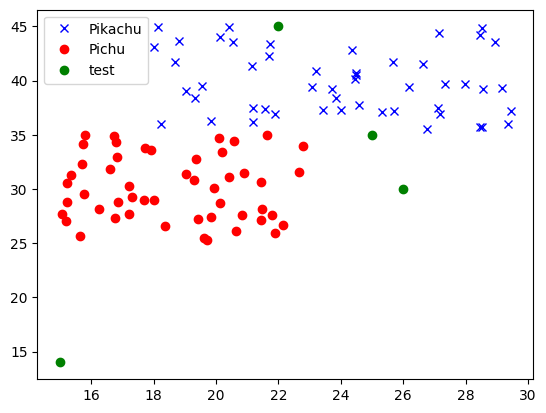

In [78]:
import matplotlib.pyplot as plt
import re

# the Readdata reads a file rowwise 
# - much better approach if Bigdata is appoached 
# - the function is adopted to handle both input types of files (DRY)

def ReadData(filename):
    file1 = open(filename, 'r')
    count = 0
    # initialize two vectors for X and Y coordinates 
    x_values = []
    y_values = []
    # header in pikachu and Pichu datafiles, inspiration for regexp fetched 
    # from ChatGPT
    head=r'\(\s*width\s*\(\s*cm\s*\),\s*height\s*\(\s*cm\s*\)\)'
    # skip the header
    line = file1.readline()
    if re.match(head,line): # if the first line matches the regexp, it is a pikachu or pichu file
        while True:
            count += 1
        
            # Get next line from file (i.e. skips the header from being processed)
            line = file1.readline()
            
            # if line is empty
            # end of file is reached
            if not line:
                break
            values = line.strip('()\n').split(', ') # Clean data  
            x_values.append(float(values[0]))
            y_values.append(float(values[1]))
            # print("Line{}: {}".format(count, line.strip()))
        file1.close()
    else: # else if it does not match the regexp, it's the testfile
        while True:
            values = line.split("),") # create elements of test data
            for tpair in values:
                myval=tpair.strip('\(\)').strip() 
                # for some reason this is necessary to clean some more
                xyval=myval.strip('\()').split(',') 
                # print(f"{xyval}") = [x1, y1], [x2, y2] ...
                x_values.append(float(xyval[0]))
                y_values.append(float(xyval[1]))
            line=file1.readline()
            # test for end of file
            if not line:
                break

        file1.close()
    # return the vectors, i.e. [[xvalues],[yvalues]]
    return [x_values,y_values]

# Read the data from the files, pichachu is vect1, pichu vect2 and test data is vect3 
vect1=ReadData('Pikachu.txt')
vect2=ReadData('Pichu.txt')
vect3=ReadData('test_points.txt')

# plotting a figure

plt.figure()
plt.plot(vect1[0],vect1[1],'bx', label='Pikachu')
plt.plot(vect2[0],vect2[1], 'ro', label='Pichu')
plt.plot(vect3[0],vect3[1], 'go', label='Test')
plt.legend(("Pikachu", "Pichu","test"))



### Euclidian distance 
Th euclidian is calculated between the testpoints and respective category.
The resulting vectors are then sorted.

In [79]:
# Function calculating the Euclidean distance

def euclidian(x1, y1, x2, y2):
    return ((x1-x2)**2 +(y1-y2)**2)**0.5

# Calculating distance beween traget vector (points to classify) and source 
# vector (data points for the known classes)

def CalcDist(targetvect, sourcevect):
    # create some empty vectors for result and resurning the sorted result
    resultv=[] 
    sortedresults=[]
    for i,x in enumerate(targetvect[0]):
        # add an element to the vector since there are several test points
        resultv.append([])
        sortedresults.append([])
        # culculate the euclidian distance for test point i
        for j,y in enumerate(sourcevect[0]):
            resultv[i].append(euclidian(targetvect[0][i],targetvect[1][i],sourcevect[0][j],sourcevect[1][j]))
        # sort the distances (default smallest to largest)
        sortedresults[i]=sorted(resultv[i])
    return sortedresults

# Obtain the sorted Euclidean distances form the known classes

sortedPikachu= CalcDist(vect3,vect1)
sortedPichu= CalcDist(vect3,vect2)




### Comparing the smallest distance to testpoints and predict outcome


In [80]:
def Classify(invect):
    for i,x in enumerate(invect[0]):
        if sortedPikachu[i][0] < sortedPichu[i][0]:
            print(f"Sample with (width, height): ({invect[0][i]},{invect[1][i]}) classified as Pikachu")
        elif sortedPikachu[i][0] > sortedPichu[i][0]:
            print(f"Sample with (width, height): ({invect[0][i]},{invect[1][i]}) classified as Pichu")
        else:
            print(f"Sample with (width, height): ({invect[0][i]},{invect[1][i]}) is indeterminate")

# Classify the test data

Classify(vect3)


Sample with (width, height): (25.0,35.0) classified as Pikachu
Sample with (width, height): (15.0,14.0) classified as Pichu
Sample with (width, height): (26.0,30.0) classified as Pichu
Sample with (width, height): (22.0,45.0) classified as Pikachu


## Assignments

let the user enter a point (x, y) and make a classification (Pikachu 
or Pichu)

Sample with (width, height): (34,34) classified as Pikachu


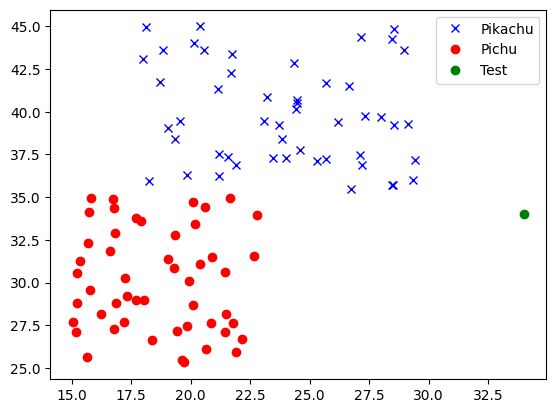

In [82]:
from numbers import Number


# Error handling in user input is inspired from Stack Owerflow.

# Function to read the coordinate, making sure it's a valid integer
def Readcoordinate(coord):
    while True:
        try:
            intTarget = int(input(f"Your {coord} coordinate (must be an int >=0?"))
        except ValueError:
            continue
        else:
            if intTarget < 1:
                continue
            else:
                return (intTarget)
            



xcoord=Readcoordinate("X")
ycoord=Readcoordinate("Y")

# Obtain the uniput in the choosen format [[xcoords vektor][ycords vektor]]
target=[[xcoord],[ycoord]]

pikachusar= CalcDist(target,vect1) # calculate distances to Pikachu
pichusar =CalcDist(target,vect2) # calculate distances to pichu

# Compare to the first element of the distance vector (since this is sorted)
# in order to check suggested classification
if pikachusar[0]< pichusar[0]:
    print(f"Sample with (width, height): ({xcoord},{ycoord}) classified as Pikachu")
elif pikachusar[0] > pichusar[0]:
    print(f"Sample with (width, height): ({xcoord},{ycoord}) classified as Pichu")
else:
    print(f"Sample with (width, height): ({xcoord},{ycoord}) is indeterminate")



plt.figure()
plt.plot(vect1[0],vect1[1],'bx', label='Pikachu')
plt.plot(vect2[0],vect2[1], 'ro', label='Pichu')
plt.plot(xcoord,ycoord, 'go', label='Test')
plt.legend(("Pikachu", "Pichu","Test"))

## Task 2
Instead of using the closest point, base the classification on the five closest points.
The majority decides which class it should be based classified as.

- In part I this approach is tested on the test points given in the assignment
- In part II this approach is used on a point supplied by the user 

### Part I - Five closest on test data

In [83]:

# since we already have the distances between all pichu/pikachu points and testpoints
# just shorten the list to 5 points in the sorted distance list for each class (five is 
# the maximal number if all comes from one of the classes) - memory efficiency...

# the typ5dist function will also add the reference to which testpoint and a 
# class representation to the list i.e. [testpoint, distance, classid]


def typ5dist(target, source, id):
    top5res=[]
    for i,x in enumerate(target[0]):
        top5res.append([])
        makemyres=source[i][:5]
        for z in makemyres:
            top5res[i].append([i, z, id])
    return top5res

# Now obtained the top 5 from each of the testpoints for Pikachu and Pichu
# sortedPikachu and sordedPichu contains a list of list, a list for the 
# given testpoint distances in a list of all the testpoints


pikachu5top=typ5dist(vect3, sortedPikachu, 1)
pichu5top=typ5dist(vect3, sortedPichu, 2)

# functions to join the top 5 lists for the testpoint list from each class (Pikatchu and Pichu), 
# That is, if we merge/join the to category lists we can use the traditional sort  
# on distance to count the occurence of each category in the top 5.

def joinmerge (test, pikachu5sort, pichu5sort):
    major=[]
    for z,b in enumerate(test[0]):
        major.append(pikachu5sort[z]+pichu5sort[z])
    return major

# sorting
def sub_points_category(out):
    sorted_list=[]
    for j,x in enumerate(out):
        tmp=out[j]
        # using lambda sort on second element of vector
        sorted_list.append(sorted(tmp, key=lambda x: x[1]))
    return sorted_list

# function for classification
def judge(out_list, test): 
    # test is the target vector, to enable printouts
    # iterate over all test items
    for j,x in enumerate(out_list):
        count_pichu=0
        count_pikacchu=0
        measure=out_list[j][:5]
        # iterate over the distances for the test item and count frequences
        for i,z in enumerate(measure):
            if out_list[j][i][2]==1:
                count_pikacchu +=1
            else:
                count_pichu +=1
        # classify based on the frequences
        if (count_pikacchu > count_pichu):
            print(f"Sample with (width, height): ({test[0][j]},{test[1][j]}) classified as Pikachu favour {count_pikacchu} to {count_pichu}")
        elif (count_pikacchu < count_pichu):
            print(f"Sample with (width, height): ({test[0][j]},{test[1][j]}) classified as Pichu favour {count_pichu} to {count_pikacchu}")
        else:
             # this cannot happen but kept in case of further development
             print(f"Sample with (width, height): ({test[0][j]},{test[1][j]}) is indeterminate") 


judge(sub_points_category(joinmerge(vect3,pikachu5top,pichu5top)), vect3)



Sample with (width, height): (25.0,35.0) classified as Pikachu favour 4 to 1
Sample with (width, height): (15.0,14.0) classified as Pichu favour 5 to 0
Sample with (width, height): (26.0,30.0) classified as Pichu favour 5 to 0
Sample with (width, height): (22.0,45.0) classified as Pikachu favour 5 to 0


###  Part II User input supplied point and classification based on five closest
- let the user inpout a point in 2D space
- use previous approach to classify the points

Sample with (width, height): (23,34) classified as Pichu favour 4 to 1


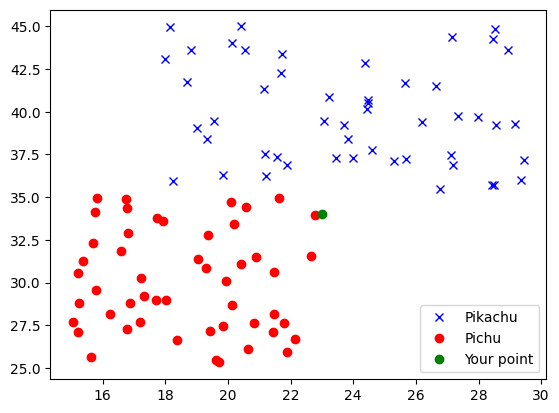

In [84]:
x5coord=Readcoordinate("X")
y5coord=Readcoordinate("Y")

target=[[x5coord],[y5coord]]

pikachus= CalcDist(target,vect1) # calculate distances to Pikachu
pichus =CalcDist(target,vect2) # calculate distances to pichu

# add information to list items (such that previous functions in part I can be applied)
top5pika=typ5dist(target, pikachus, 1)
top5pich=typ5dist(target, pichus, 2)


judge(sub_points_category(joinmerge(target,top5pika,top5pich)),target)

plt.figure()
plt.plot(vect1[0],vect1[1],'bx', label='Pikachu')
plt.plot(vect2[0],vect2[1], 'ro', label='Pichu')
plt.plot(x5coord,y5coord, 'go', label='Test')
plt.legend(("Pikachu", "Pichu","Your point"))

## Bonus task 
- Random selection of 45 Pikatchu and 45  Pichu as training set
- using 10 testdata, 5 Picachu and 5 Pichu
- using confusion matrix to measure performance


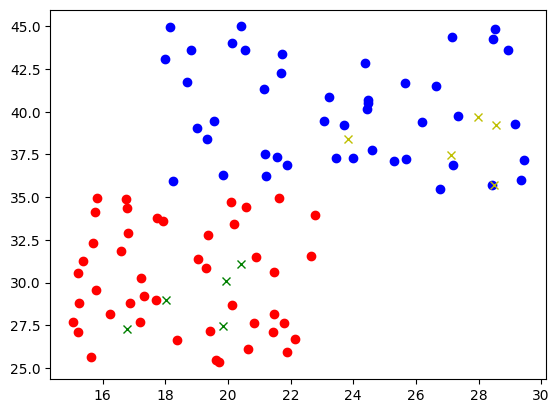

In [72]:
# Random selection of data, using the data we already have read in (vect1 - Pikachu, vect2 - Pichu)
import numpy as np

# Function for getting the datapoints from a vector of index
def create_data(testvektor,datavector):
    test=[]
    test.append([]) # vector for x coords
    test.append([]) # vector for y coords
    test[0] = [datavector[0][i] for i in testvektor]
    test[1] = [datavector[1][i] for i in testvektor]
    return test
# use random from numpy to create index for 45  training points
pikachu45= np.random.choice(range(0, 50),45, replace=False).tolist()
# create a vector for all index
all=[x for x in range(0,50)]
# remove those that are not training points
testpikachu= [v for i, v in enumerate(all) if i not in sorted(pikachu45)]

pichu45=np.random.choice(range(0, 50),45, replace=False).tolist()
testpichu= [v for i, v in enumerate(all) if i not in sorted(pichu45)]


pichu_test=create_data(testpichu,vect2)
train_pichu=create_data(pichu45,vect2)

pikachu_test=create_data(testpikachu,vect1)
train_pikachu=create_data(pikachu45, vect1)

# plot the graph of testpoints and training points

plt.figure()
plt.plot(train_pichu[0],train_pichu[1], 'ro', label='Pichu')
plt.plot(pichu_test[0],pichu_test[1], 'gx', label='Pichu')
plt.plot(train_pikachu[0],train_pikachu[1], 'bo', label='Pichu')
plt.plot(pikachu_test[0],pikachu_test[1], 'yx', label='Pichu')



### Calculating the distance vectors test vs training

In [87]:
# Function for classifying, similar to judge function above 
# but here printouts are removed in favor of returning counts
# the parameter base (base of decision) is the number of closest 
# neighbourgs the classification should be made upon.

def judge2(out_list, base): # test parameter is not used here, i.e. could be removed 
    # test is the target vector, to enable printouts
    # iterate over all testitems
    count_pichu=0
    count_pikacchu=0
    count_errpichu=0
    count_errpika=0
    for j,x in enumerate(out_list):
        
        measure=out_list[j][:base]
        for i,z in enumerate(measure):
            if out_list[j][i][2]==1:
                count_pikacchu +=1
            elif out_list[j][i][2]==2:
                count_pichu +=1
            elif out_list[j][i][2]==3:
                count_errpichu +=1
            else:
                count_errpika +=1
        
    # return the counts for the different outcomes
    return np.array([count_pikacchu, count_pichu, count_errpichu, count_errpika])




# calculate the distance between test sets and training sets
# x =[[distances (45) first test point],[distances second test point]]
x1=CalcDist(pichu_test, train_pichu) # pichu FN distances
x2=CalcDist(pichu_test ,train_pikachu) # pikachu FP distances
x3=CalcDist(pikachu_test, train_pikachu) # pikachu TPs distances
x4=CalcDist(pikachu_test, train_pichu) # pichu TN distances

# Truncate the distance list to 5 points and put label on 
# test sample so we know its origin [testpoint_id, dist, testorigin]

pika1true=typ5dist(pikachu_test, x3, 1)
pichu1true=typ5dist(pichu_test, x2, 3)
pichu5true=typ5dist(pichu_test, x1, 2)
pikachu5false=typ5dist(pikachu_test, x4, 4)
res1=judge2(sub_points_category(joinmerge(pikachu_test,pika1true, pikachu5false)),1)
res2=judge2(sub_points_category(joinmerge(pichu_test,pichu1true, pichu5true)),1)

# since these are numpy arrays, add the result together...
totres=res1+res2

print(f"Accuracy={(totres[0]+totres[1])/(totres.sum())*100.00}")
#judge(sub_points_category(joinmerge(vect3,pikachu5top,pichu5top)), vect3)

Accuracy=100.0


### Test procedure of random selection
- ransom select 5 Pikachu and 5 Pichu for testing, remaining is used for training.
- run the ransom selection 99 times, using the five closest neighbours for classification
- accuracy of each round is stored in a vector, used for ploting

In [91]:
totrounds=[]
for z in range(1,100):
    pikachu45= np.random.choice(range(0, 50),45, replace=False).tolist()
    all=[x for x in range(0,50)]
    testpikachu= [v for i, v in enumerate(all) if i not in sorted(pikachu45)]

    pichu45=np.random.choice(range(0, 50),45, replace=False).tolist()
    testpichu= [v for i, v in enumerate(all) if i not in sorted(pichu45)]


    pichu_test=create_data(testpichu,vect2)
    train_pichu=create_data(pichu45,vect2)

    pikachu_test=create_data(testpikachu,vect1)
    train_pikachu=create_data(pikachu45, vect1)

    x1=CalcDist(pichu_test, train_pichu) # pichu FN distances
    x2=CalcDist(pichu_test ,train_pikachu) # pikachu FP distances
    x3=CalcDist(pikachu_test, train_pikachu) # pikachu TPs distances
    x4=CalcDist(pikachu_test, train_pichu) # pichu TN distances

    # Truncate the distance list to 5 points and put label on 
    # test sample so we know its origin [testpoint_id, dist, testorigin]

    pika1true=typ5dist(pikachu_test, x3, 1)
    pichu1false=typ5dist(pichu_test, x2, 3)
    pichu1true=typ5dist(pichu_test, x1, 2)
    pikachu5false=typ5dist(pikachu_test, x4, 4)
    res1=judge2(sub_points_category(joinmerge(pikachu_test,pika1true, pikachu5false)),5)
    res2=judge2(sub_points_category(joinmerge(pichu_test,pichu1true, pichu1false)),5)
    totres=res1+res2
    totrounds.append((totres[0]+totres[1])/(totres.sum())*100.00)


Show output (accuracy) of the 99 round of random selection

Mean accuracy 96.9090909090909 


<BarContainer object of 99 artists>

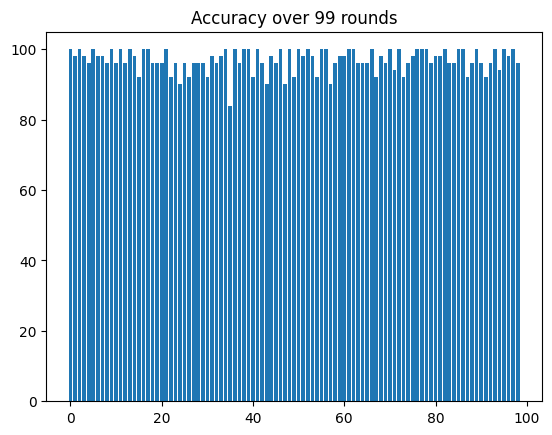

In [93]:
print(f"Mean accuracy {np.array(totrounds).mean()} ")
xstep=[x for x in range(0,99)]
totrounds
plt.figure()
plt.title("Accuracy over 99 rounds")
plt.bar(xstep,totrounds)
